In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import torch

In [2]:
vin = pandas.read_csv('./data/VIN.csv')
vin

,/VIN (VIN=0) X,/VIN (VIN=0) Y,/VIN (VIN=0.001) X,/VIN (VIN=0.001) Y,/VIN (VIN=0.002) X,/VIN (VIN=0.002) Y,/VIN (VIN=0.003) X,/VIN (VIN=0.003) Y,/VIN (VIN=0.004) X,/VIN (VIN=0.004) Y,...,/VIN (VIN=1.996) X,/VIN (VIN=1.996) Y,/VIN (VIN=1.997) X,/VIN (VIN=1.997) Y,/VIN (VIN=1.998) X,/VIN (VIN=1.998) Y,/VIN (VIN=1.999) X,/VIN (VIN=1.999) Y,/VIN (VIN=2) X,/VIN (VIN=2) Y
0,0.000,0,0.000,0.001,0.000,0.002,0.000,0.003,0.000,0.004,...,0.000,1.996,0.000,1.997,0.000,1.998,0.000,1.999,0.000,2
1,0.001,0,0.001,0.001,0.001,0.002,0.001,0.003,0.001,0.004,...,0.001,1.996,0.001,1.997,0.001,1.998,0.001,1.999,0.001,2
2,0.002,0,0.002,0.001,0.002,0.002,0.002,0.003,0.002,0.004,...,0.002,1.996,0.002,1.997,0.002,1.998,0.002,1.999,0.002,2
3,0.003,0,0.003,0.001,0.003,0.002,0.003,0.003,0.003,0.004,...,0.003,1.996,0.003,1.997,0.003,1.998,0.003,1.999,0.003,2
4,0.004,0,0.004,0.001,0.004,0.002,0.004,0.003,0.004,0.004,...,0.004,1.996,0.004,1.997,0.004,1.998,0.004,1.999,0.004,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,4.996,0,4.996,0.001,4.996,0.002,4.996,0.003,4.996,0.004,...,4.996,1.996,4.996,1.997,4.996,1.998,4.996,1.999,4.996,2
4997,4.997,0,4.997,0.001,4.997,0.002,4.997,0.003,4.997,0.004,...,4.997,1.996,4.997,1.997,4.997,1.998,4.997,1.999,4.997,2
4998,4.998,0,4.998,0.001,4.998,0.002,4.998,0.003,4.998,0.004,...,4.998,1.996,4.998,1.997,4.998,1.998,4.998,1.999,4.998,2
4999,4.999,0,4.999,0.001,4.999,0.002,4.999,0.003,4.999,0.004,...,4.999,1.996,4.999,1.997,4.999,1.998,4.999,1.999,4.999,2


In [3]:
spk = pandas.read_csv('./data/VOUT.csv')
spk

,/Vout (VIN=0) X,/Vout (VIN=0) Y,/Vout (VIN=0.001) X,/Vout (VIN=0.001) Y,/Vout (VIN=0.002) X,/Vout (VIN=0.002) Y,/Vout (VIN=0.003) X,/Vout (VIN=0.003) Y,/Vout (VIN=0.004) X,/Vout (VIN=0.004) Y,...,/Vout (VIN=1.996) X,/Vout (VIN=1.996) Y,/Vout (VIN=1.997) X,/Vout (VIN=1.997) Y,/Vout (VIN=1.998) X,/Vout (VIN=1.998) Y,/Vout (VIN=1.999) X,/Vout (VIN=1.999) Y,/Vout (VIN=2) X,/Vout (VIN=2) Y
0,0.000,0.102050,0.000,0.102050,0.000,0.102050,0.000,0.102050,0.000,0.102050,...,0.000,0.102050,0.000,0.102050,0.000,0.102050,0.000,0.102050,0.000,0.102050
1,0.001,0.102050,0.001,0.102050,0.001,0.102050,0.001,0.102050,0.001,0.102050,...,0.001,0.102052,0.001,0.102052,0.001,0.102052,0.001,0.102052,0.001,0.102052
2,0.002,0.102050,0.002,0.102050,0.002,0.102050,0.002,0.102050,0.002,0.102050,...,0.002,0.102057,0.002,0.102057,0.002,0.102057,0.002,0.102057,0.002,0.102057
3,0.003,0.102050,0.003,0.102050,0.003,0.102050,0.003,0.102050,0.003,0.102050,...,0.003,0.102066,0.003,0.102066,0.003,0.102066,0.003,0.102066,0.003,0.102066
4,0.004,0.102050,0.004,0.102050,0.004,0.102050,0.004,0.102050,0.004,0.102050,...,0.004,0.102078,0.004,0.102078,0.004,0.102078,0.004,0.102078,0.004,0.102078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,4.996,0.102121,4.996,0.102122,4.996,0.102123,4.996,0.102123,4.996,0.102124,...,4.996,0.581674,4.996,0.581679,4.996,0.581685,4.996,0.581690,4.996,0.581695
4997,4.997,0.102121,4.997,0.102122,4.997,0.102123,4.997,0.102123,4.997,0.102124,...,4.997,0.581082,4.997,0.581052,4.997,0.581022,4.997,0.580992,4.997,0.580962
4998,4.998,0.102121,4.998,0.102122,4.998,0.102123,4.998,0.102123,4.998,0.102124,...,4.998,0.579902,4.998,0.579866,4.998,0.579830,4.998,0.579794,4.998,0.579757
4999,4.999,0.102121,4.999,0.102122,4.999,0.102123,4.999,0.102123,4.999,0.102124,...,4.999,0.578723,4.999,0.578680,4.999,0.578638,4.999,0.578595,4.999,0.578552


In [4]:
t   = torch.tensor(vin.iloc[:,0].to_numpy()).repeat(2000,1).T
VIN = torch.tensor(vin.iloc[:,1:-1:2].to_numpy())
VOUT = torch.tensor(spk.iloc[:,1:-1:2].to_numpy())

data = torch.stack([t, VIN, VOUT])
data = data[:,:3000:10,:]
data.shape

torch.Size([3, 300, 2000])

Text(0, 0.5, 'V_out')

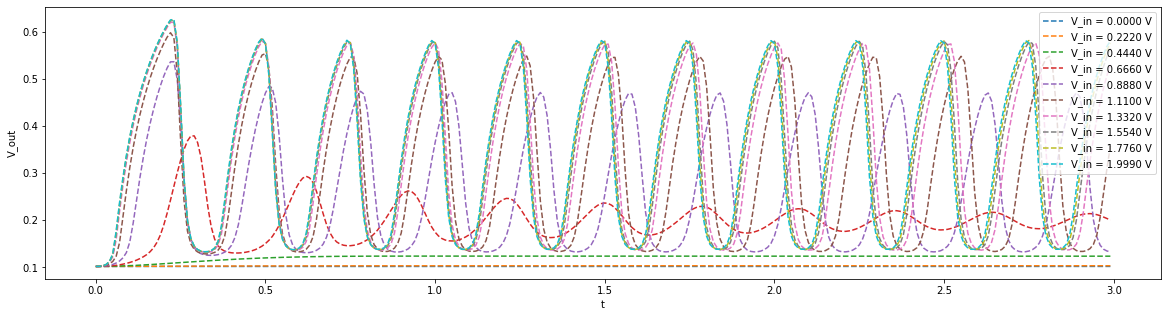

In [7]:
plt.figure(figsize=[20,5])
for k in np.linspace(0,data.shape[2]-1,10).astype(int):
    i = k
    plt.plot(data[0,:,i], data[2,:,i], '--', label=f'V_in = {data[1,0,i]:.4f} V')
plt.legend()
plt.xlabel('t')
plt.ylabel('V_out')

In [8]:
np.savetxt('./data/vin_const.csv', data[1,:,:], fmt='%.8f', delimiter=',')
np.savetxt('./data/vout_const.csv', data[2,:,:], fmt='%.8f', delimiter=',')